## Import Libraries

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix

# if u are using jupyter notebook then use the below code to print the graph within the notebook
%matplotlib inline

## Load the data set

In [5]:
car_df = pd.read_csv(r'C:\\Users\\Benai\\Documents\\machin-learning\\naive-bayes\car.data',\
                     names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [198]:
# checking the first 5 row of data set
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,2,2,small,low,unacc
1,0,vhigh,2,2,small,med,unacc
2,0,vhigh,2,2,small,high,unacc
3,0,vhigh,2,2,med,low,unacc
4,0,vhigh,2,2,med,med,unacc


In [200]:
# print the shape of the data
car_df.shape

(1728, 7)

## Data Preprocessing

#### Exploratory Data Analysis

In [201]:
# checking if there is any missing values
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [237]:
# get the brief information about dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [238]:
# get the aggregation
car_df.describe()

,buying
count,1728.000000
mean,1.500000
std,1.118358
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


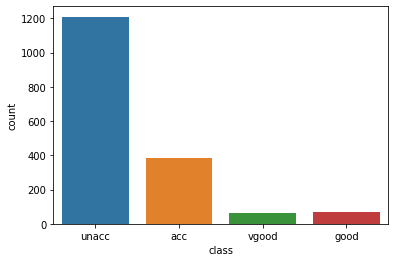

In [242]:
# check the number of target class
sns.countplot(car_df['class'])

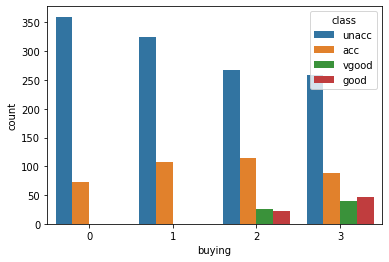

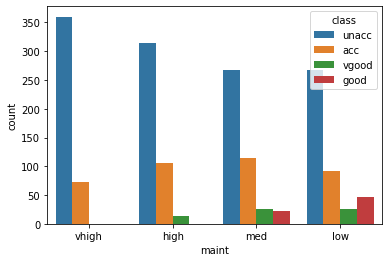

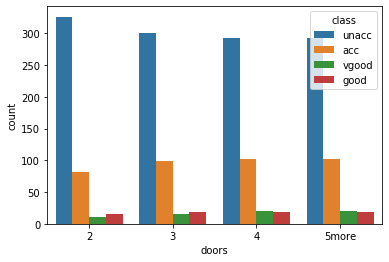

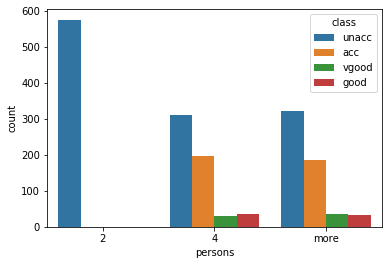

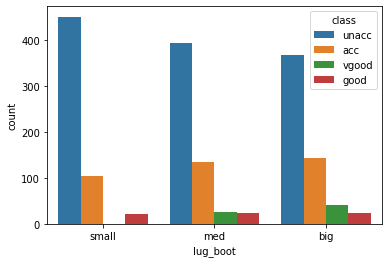

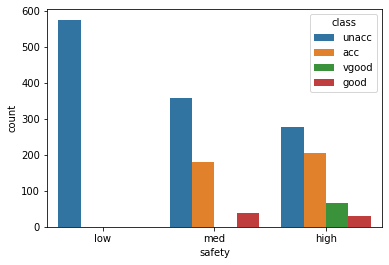

In [236]:
# loop through all the feature by our class(target) and see if there is any relation
cols = list(car_df.columns[:-1])
for i in cols:
    sns.countplot(x = i, hue='class', data=car_df)
    plt.show()

## Encoding

In [257]:
# convert categorical variable to numeric
car_df = car_df.apply(LabelEncoder().fit_transform)

In [259]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,3,0,0,2,1,2
1,0,3,0,0,2,2,2
2,0,3,0,0,2,0,2
3,0,3,0,0,1,1,2
4,0,3,0,0,1,2,2


In [263]:
# check the detail about datatype after encoding

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 54.1 KB


###  Select the predictor feature and the target variable

In [271]:
x = car_df.iloc[:, :-1]
y = car_df['class']

### Train test split

In [326]:
# split data randomly into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20, random_state=42)

### Training/model fitting

In [327]:
# creating an instance
naive_model = GaussianNB()

# Fit the model on the training data.
naive_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [328]:
# predicting

y_predict = naive_model.predict(x_test)
y_predict_train = naive_model.predict(x_train)

### Evaluating the Model

In [329]:
predict_proba = naive_model.predict_proba(x_test)

In [330]:
# Accuracy on Train
print("The Training Accuracy is: ", accuracy_score(y_train, y_predict_train))

# Accuracy on Test
print("\nThe Testing Accuracy is: ", accuracy_score(y_test, y_predict))

# Log loss
print('\nLog loss', log_loss(y_test, predict_proba))

# Number of miss classified in testing data
print('\nMiss-classified in testing data: ', (y_test != y_predict).sum())

# classification report
print('\nclassification report:\n', classification_report(y_test, y_predict))

The Training Accuracy is:  0.6874095513748191

The Testing Accuracy is:  0.661849710982659

Log loss 1.1742001723109563

Miss-classified in testing data:  117

classification report:
               precision    recall  f1-score   support

           0       0.50      0.10      0.16        83
           1       0.33      0.09      0.14        11
           2       0.80      0.86      0.83       235
           3       0.23      1.00      0.37        17

    accuracy                           0.66       346
   macro avg       0.47      0.51      0.38       346
weighted avg       0.69      0.66      0.63       346



In [325]:
# print confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 13,   0,  64,  41],
       [  3,   4,   3,   9],
       [ 10,   4, 310,  34],
       [  0,   0,   0,  24]], dtype=int64)

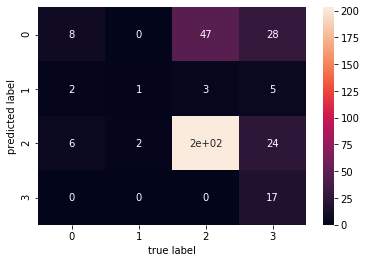

In [316]:
# visualize confusion matrix
sns.heatmap(cm, xticklabels=naive_model.classes_, yticklabels=naive_model.classes_, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()